In [125]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-125-d27e9a4ab0aa>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [126]:
#loading the dataset
df= pd.read_excel("/content/Airlines+Data.xlsx")

In [127]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [128]:
#EDA

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [130]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [131]:
#encoding

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
le=LabelEncoder()

In [134]:
df["t"]=le.fit_transform(df["Month"])

In [135]:
df

,Month,Passengers,t
0,1995-01-01,112,0
1,1995-02-01,118,1
2,1995-03-01,132,2
3,1995-04-01,129,3
4,1995-05-01,121,4
...,...,...,...
91,2002-08-01,405,91
92,2002-09-01,355,92
93,2002-10-01,306,93
94,2002-11-01,271,94


In [136]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using
# Date functions from pandas
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction

#df["Day"] = df.Date.dt.strftime("%d") # Day extraction
#df["wkday"] = df.Date.dt.strftime("%A") # weekday extraction

In [137]:
df

,Month,Passengers,t,Date,month,year
0,1995-01-01,112,0,1995-01-01,Jan,1995
1,1995-02-01,118,1,1995-02-01,Feb,1995
2,1995-03-01,132,2,1995-03-01,Mar,1995
3,1995-04-01,129,3,1995-04-01,Apr,1995
4,1995-05-01,121,4,1995-05-01,May,1995
...,...,...,...,...,...,...
91,2002-08-01,405,91,2002-08-01,Aug,2002
92,2002-09-01,355,92,2002-09-01,Sep,2002
93,2002-10-01,306,93,2002-10-01,Oct,2002
94,2002-11-01,271,94,2002-11-01,Nov,2002


In [138]:
#creating a new column t_squared by squaring the t values in it

In [139]:
df["t_squared"]=df["t"]**2

In [140]:
df

,Month,Passengers,t,Date,month,year,t_squared
0,1995-01-01,112,0,1995-01-01,Jan,1995,0
1,1995-02-01,118,1,1995-02-01,Feb,1995,1
2,1995-03-01,132,2,1995-03-01,Mar,1995,4
3,1995-04-01,129,3,1995-04-01,Apr,1995,9
4,1995-05-01,121,4,1995-05-01,May,1995,16
...,...,...,...,...,...,...,...
91,2002-08-01,405,91,2002-08-01,Aug,2002,8281
92,2002-09-01,355,92,2002-09-01,Sep,2002,8464
93,2002-10-01,306,93,2002-10-01,Oct,2002,8649
94,2002-11-01,271,94,2002-11-01,Nov,2002,8836


In [141]:
# creating log values for passengers for further use by creating new column as log_passengers and storing the log values in them

In [142]:
df["log_passengers"]=np.log(df["Passengers"])

In [143]:
df

,Month,Passengers,t,Date,month,year,t_squared,log_passengers
0,1995-01-01,112,0,1995-01-01,Jan,1995,0,4.718499
1,1995-02-01,118,1,1995-02-01,Feb,1995,1,4.770685
2,1995-03-01,132,2,1995-03-01,Mar,1995,4,4.882802
3,1995-04-01,129,3,1995-04-01,Apr,1995,9,4.859812
4,1995-05-01,121,4,1995-05-01,May,1995,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,91,2002-08-01,Aug,2002,8281,6.003887
92,2002-09-01,355,92,2002-09-01,Sep,2002,8464,5.872118
93,2002-10-01,306,93,2002-10-01,Oct,2002,8649,5.723585
94,2002-11-01,271,94,2002-11-01,Nov,2002,8836,5.602119


In [144]:
#visualization for better understanding

<Axes: xlabel='month', ylabel='year'>

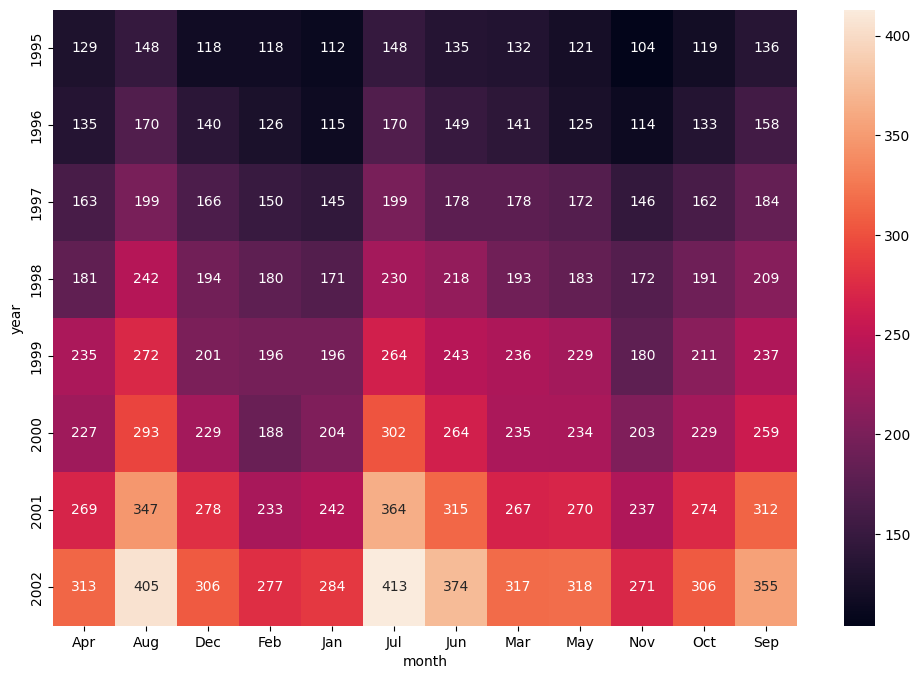

In [145]:
plt.figure(figsize=(12,8))
heatmap_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_month,annot=True,fmt="g") #fmt is format of the grid values


In [146]:
#boxplot

<Axes: xlabel='month', ylabel='Passengers'>

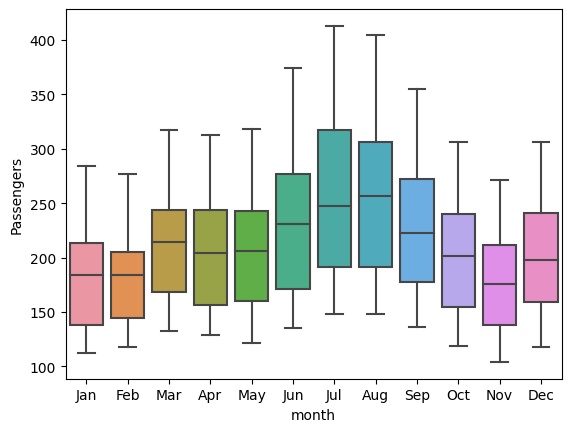

In [147]:
sns.boxplot(x="month",y="Passengers",data=df)

<Axes: xlabel='year', ylabel='Passengers'>

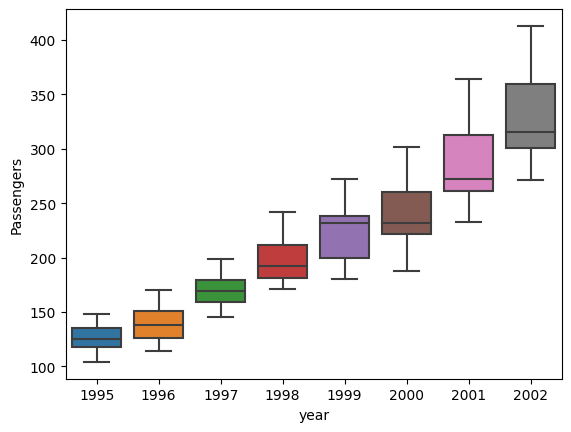

In [148]:
sns.boxplot(x="year",y="Passengers",data=df)

<Axes: xlabel='year', ylabel='Passengers'>

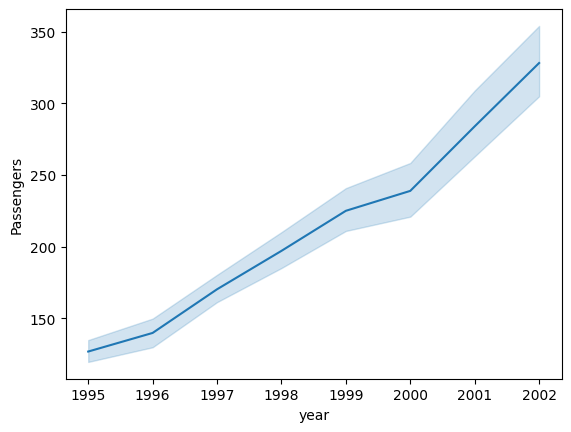

In [149]:
#lineplot
sns.lineplot(x="year",y="Passengers",data=df)

SPLIITING DATA

In [150]:
len(df)

96

In [151]:
train= df.head(82)
test= df.tail(14)

In [152]:
test

,Month,Passengers,t,Date,month,year,t_squared,log_passengers
82,2001-11-01,237,82,2001-11-01,Nov,2001,6724,5.468060
83,2001-12-01,278,83,2001-12-01,Dec,2001,6889,5.627621
84,2002-01-01,284,84,2002-01-01,Jan,2002,7056,5.648974
85,2002-02-01,277,85,2002-02-01,Feb,2002,7225,5.624018
86,2002-03-01,317,86,2002-03-01,Mar,2002,7396,5.758902
87,2002-04-01,313,87,2002-04-01,Apr,2002,7569,5.746203
88,2002-05-01,318,88,2002-05-01,May,2002,7744,5.762051
89,2002-06-01,374,89,2002-06-01,Jun,2002,7921,5.924256
90,2002-07-01,413,90,2002-07-01,Jul,2002,8100,6.023448
91,2002-08-01,405,91,2002-08-01,Aug,2002,8281,6.003887


In [153]:
#linear model

In [154]:
import statsmodels.formula.api as smf

In [155]:
model=smf.ols("Passengers~t",data=train).fit()

In [156]:
pred_linear =  pd.Series(model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


49.69965520001812

In [157]:
#Exponential
model1= smf.ols("log_passengers~t",data=train).fit()

In [158]:
pred_exponential=pd.Series(model1.predict(pd.DataFrame(test["t"])))
rmse_exponential= np.sqrt(np.mean((np.array(test["Passengers"])-np.array(pred_exponential))**2))
rmse_exponential


316.2942640131662

In [159]:
#quadratic

In [160]:
model2= smf.ols("Passengers~t+t_squared",data=df).fit()

In [161]:
pred_quad=pd.Series(model2.predict(test[["t","t_squared"]]))
rmse_quad=np.sqrt(np.mean((np.array(test["Passengers"])-np.array(pred_quad))**2))

In [162]:
rmse_quad

45.94026575117009

In [163]:
#comparing the rmse values

In [164]:
data={"model":pd.Series(["rmse_linear","rmse_exponential","rmse_quad"]),"rmse.values":pd.Series([rmse_linear,rmse_exponential,rmse_quad])}
rmse_scores=pd.DataFrame(data)
rmse_scores.sort_values(["rmse.values"])

,model,rmse.values
2,rmse_quad,45.940266
0,rmse_linear,49.699655
1,rmse_exponential,316.294264


In [165]:
#so therefore we can consider quadratic model for forecasting

In [166]:
#visualization
df

,Month,Passengers,t,Date,month,year,t_squared,log_passengers
0,1995-01-01,112,0,1995-01-01,Jan,1995,0,4.718499
1,1995-02-01,118,1,1995-02-01,Feb,1995,1,4.770685
2,1995-03-01,132,2,1995-03-01,Mar,1995,4,4.882802
3,1995-04-01,129,3,1995-04-01,Apr,1995,9,4.859812
4,1995-05-01,121,4,1995-05-01,May,1995,16,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,91,2002-08-01,Aug,2002,8281,6.003887
92,2002-09-01,355,92,2002-09-01,Sep,2002,8464,5.872118
93,2002-10-01,306,93,2002-10-01,Oct,2002,8649,5.723585
94,2002-11-01,271,94,2002-11-01,Nov,2002,8836,5.602119


In [167]:
#moving averages

In [168]:
#time series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

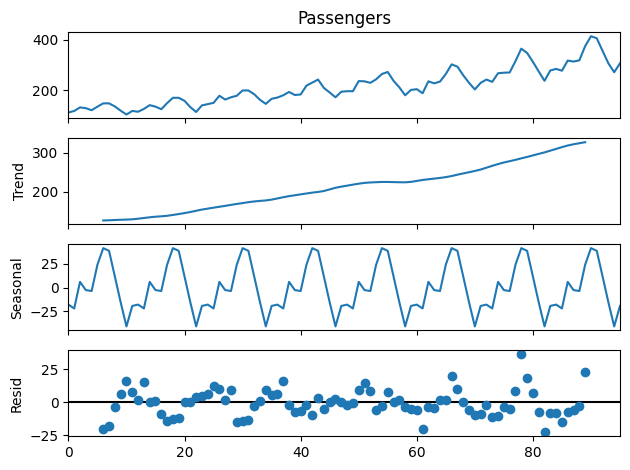

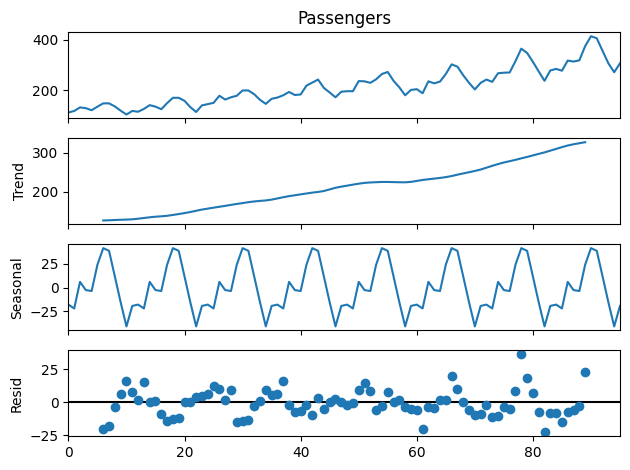

In [169]:
ts_decomp = seasonal_decompose(df.Passengers,period=12)
ts_decomp.plot()

In [170]:
#acf plot pacf plot

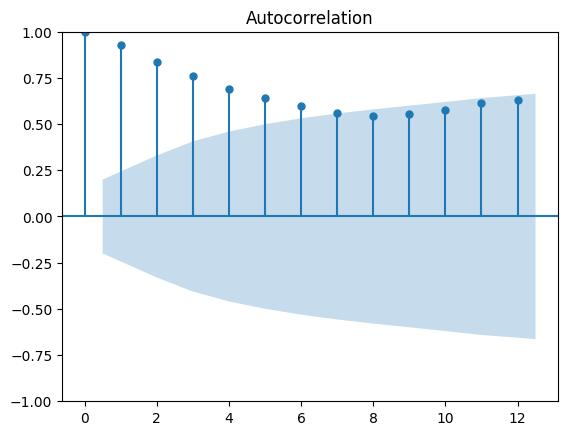

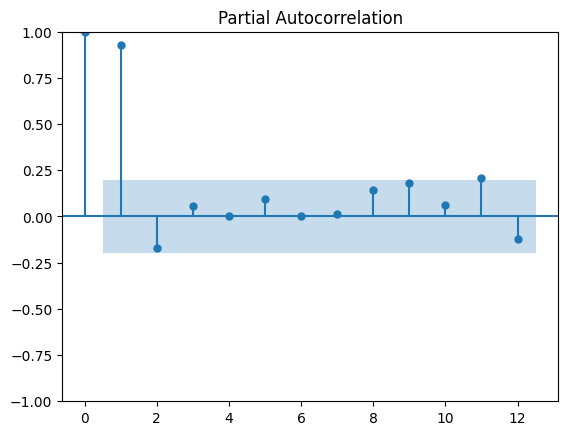

In [171]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()


EVALUATION METRIC MAPE

In [172]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [173]:
def MAPE(pred,org):
  tp=np.abs((pred-org)/org)*100
  return np.mean(tp)

SIMPLE EXPONENTIAL METHOD

In [174]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


12.187436131830044

HOLT METHOD

In [175]:
  # Holt method
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


18.567853876948043

Holts winter exponential smoothing with additive seasonality and additive trend

In [176]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

5.787766026575883

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [177]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

3.4407947320072183

FINAL MODEL BY  TRAIN TEST

In [178]:
hwe_model_add_add = ExponentialSmoothing(df.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit()

In [179]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235270
97     311.528386
98     350.278691
99     346.984976
100    351.845022
101    403.925707
102    440.566797
103    427.446477
104    376.628169
105    329.767502
dtype: float64

CocoCola dataset

In [180]:
from pandas import datetime
dt=pd.read_excel("/content/CocaCola_Sales_Rawdata (1).xlsx")


<ipython-input-180-1f115a31566e>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [181]:
dt

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [182]:
#encoding using label encoder

In [183]:
from sklearn.preprocessing import LabelEncoder

In [184]:
le=LabelEncoder()
dt["t"]=le.fit_transform(dt["Quarter"])

In [185]:
dt

,Quarter,Sales,t
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,11
2,Q3_86,2533.804993,22
3,Q4_86,2154.962997,32
4,Q1_87,1547.818996,1
5,Q2_87,2104.411995,12
6,Q3_87,2014.362999,23
7,Q4_87,1991.746998,33
8,Q1_88,1869.049999,2
9,Q2_88,2313.631996,13


In [186]:
dt_= dt.sort_values(by='t')
dt_

,Quarter,Sales,t
0,Q1_86,1734.827000,0
4,Q1_87,1547.818996,1
8,Q1_88,1869.049999,2
12,Q1_89,1910.603996,3
16,Q1_90,2148.278000,4
20,Q1_91,2480.973999,5
24,Q1_92,2772.000000,6
28,Q1_93,3056.000000,7
32,Q1_94,3352.000000,8
36,Q1_95,3854.000000,9


In [187]:
#creating a new column t_squared by squaring the t values in it
dt_["t_sqrd"]=dt_["t"]**2

In [188]:
dt_

,Quarter,Sales,t,t_sqrd
0,Q1_86,1734.827000,0,0
4,Q1_87,1547.818996,1,1
8,Q1_88,1869.049999,2,4
12,Q1_89,1910.603996,3,9
16,Q1_90,2148.278000,4,16
20,Q1_91,2480.973999,5,25
24,Q1_92,2772.000000,6,36
28,Q1_93,3056.000000,7,49
32,Q1_94,3352.000000,8,64
36,Q1_95,3854.000000,9,81


In [189]:
# creating log values for sales for further use by creating new column as log_sales and storing the log values in them

In [190]:
dt_["log_sales"]=np.log(dt_["Sales"])

In [191]:
dt_

,Quarter,Sales,t,t_sqrd,log_sales
0,Q1_86,1734.827000,0,0,7.458663
4,Q1_87,1547.818996,1,1,7.344602
8,Q1_88,1869.049999,2,4,7.533186
12,Q1_89,1910.603996,3,9,7.555175
16,Q1_90,2148.278000,4,16,7.672422
20,Q1_91,2480.973999,5,25,7.816407
24,Q1_92,2772.000000,6,36,7.927324
28,Q1_93,3056.000000,7,49,8.024862
32,Q1_94,3352.000000,8,64,8.117312
36,Q1_95,3854.000000,9,81,8.256867


In [192]:
dt_["Quarter"].unique()

array(['Q1_86', 'Q1_87', 'Q1_88', 'Q1_89', 'Q1_90', 'Q1_91', 'Q1_92',
       'Q1_93', 'Q1_94', 'Q1_95', 'Q1_96', 'Q2_86', 'Q2_87', 'Q2_88',
       'Q2_89', 'Q2_90', 'Q2_91', 'Q2_92', 'Q2_93', 'Q2_94', 'Q2_95',
       'Q2_96', 'Q3_86', 'Q3_87', 'Q3_88', 'Q3_89', 'Q3_90', 'Q3_91',
       'Q3_92', 'Q3_93', 'Q3_94', 'Q3_95', 'Q4_86', 'Q4_87', 'Q4_88',
       'Q4_89', 'Q4_90', 'Q4_91', 'Q4_92', 'Q4_93', 'Q4_94', 'Q4_95'],
      dtype=object)

In [193]:
dt_['Quarter_Numeric'] = dt_['Quarter'].map({
    'Q1_86': 1, 'Q2_86': 2, 'Q3_86': 3, 'Q4_86': 4,
    'Q1_87': 1, 'Q2_87': 2, 'Q3_87': 3, 'Q4_87': 4,
    'Q1_88': 1, 'Q2_88': 2, 'Q3_88': 3, 'Q4_88': 4,
    'Q1_89': 1, 'Q2_89': 2, 'Q3_89': 3, 'Q4_89': 4,
    'Q1_90': 1, 'Q2_90': 2, 'Q3_90': 3, 'Q4_90': 4,
    'Q1_91': 1, 'Q2_91': 2, 'Q3_91': 3, 'Q4_91': 4,
    'Q1_92': 1, 'Q2_92': 2, 'Q3_92': 3, 'Q4_92': 4,
    'Q1_93': 1, 'Q2_93': 2, 'Q3_93': 3, 'Q4_93': 4,
    'Q1_94': 1, 'Q2_94': 2, 'Q3_94': 3, 'Q4_94': 4,
    'Q1_95': 1, 'Q2_95': 2, 'Q3_95': 3, 'Q4_95': 4,
    'Q1_96': 1, 'Q2_96': 2
})

In [194]:
dt_

,Quarter,Sales,t,t_sqrd,log_sales,Quarter_Numeric
0,Q1_86,1734.827000,0,0,7.458663,1
4,Q1_87,1547.818996,1,1,7.344602,1
8,Q1_88,1869.049999,2,4,7.533186,1
12,Q1_89,1910.603996,3,9,7.555175,1
16,Q1_90,2148.278000,4,16,7.672422,1
20,Q1_91,2480.973999,5,25,7.816407,1
24,Q1_92,2772.000000,6,36,7.927324,1
28,Q1_93,3056.000000,7,49,8.024862,1
32,Q1_94,3352.000000,8,64,8.117312,1
36,Q1_95,3854.000000,9,81,8.256867,1


In [195]:
#visualization for better understanding

In [196]:
#boxplot
import seaborn as sns

<Axes: xlabel='Quarter_Numeric', ylabel='Sales'>

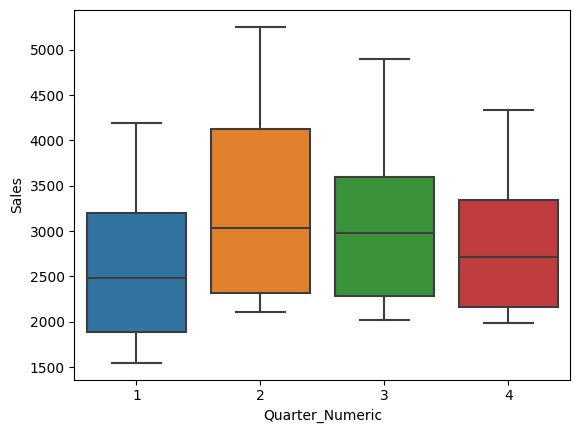

In [197]:
sns.boxplot(x="Quarter_Numeric",y="Sales",data=dt_)

<Axes: xlabel='Quarter_Numeric', ylabel='Sales'>

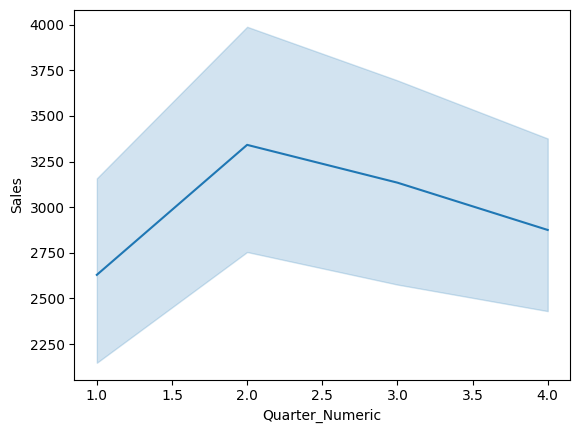

In [198]:
#lineplot

sns.lineplot(x="Quarter_Numeric",y="Sales",data=dt_)

In [199]:
#splitting the data

In [200]:
len(dt_)

42

In [201]:
train=dt_.head(31)
test=dt_.tail(11)

In [202]:
train

,Quarter,Sales,t,t_sqrd,log_sales,Quarter_Numeric
0,Q1_86,1734.827000,0,0,7.458663,1
4,Q1_87,1547.818996,1,1,7.344602,1
8,Q1_88,1869.049999,2,4,7.533186,1
12,Q1_89,1910.603996,3,9,7.555175,1
16,Q1_90,2148.278000,4,16,7.672422,1
20,Q1_91,2480.973999,5,25,7.816407,1
24,Q1_92,2772.000000,6,36,7.927324,1
28,Q1_93,3056.000000,7,49,8.024862,1
32,Q1_94,3352.000000,8,64,8.117312,1
36,Q1_95,3854.000000,9,81,8.256867,1


In [203]:
test

,Quarter,Sales,t,t_sqrd,log_sales,Quarter_Numeric
38,Q3_95,4895.000000,31,961,8.495970,3
3,Q4_86,2154.962997,32,1024,7.675529,4
7,Q4_87,1991.746998,33,1089,7.596767,4
11,Q4_88,2026.828999,34,1156,7.614228,4
15,Q4_89,2173.967995,35,1225,7.684309,4
19,Q4_90,2556.009995,36,1296,7.846203,4
23,Q4_91,2879.000999,37,1369,7.965199,4
27,Q4_92,3243.859993,38,1444,8.084519,4
31,Q4_93,3373.000000,39,1521,8.123558,4
35,Q4_94,4017.000000,40,1600,8.298291,4


In [204]:
#linear model

In [205]:
import statsmodels.formula.api as smf

In [206]:
model=smf.ols("Sales~t",data=dt_).fit()

In [207]:
pred_linear1 =  pd.Series(model.predict(pd.DataFrame(test['t'])))
rmse_linear1 = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear1))**2))
rmse_linear1

983.9503630216541

In [208]:
#quadratic

In [209]:
model1= smf.ols("Sales~t+t_sqrd",data=dt_).fit()

In [210]:
pred_quad=pd.Series(model1.predict(test[["t","t_sqrd"]]))
rmse_quad1=np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_quad))**2))
rmse_quad1

1017.5125766840157

In [211]:
#Exponential

In [212]:
model2= smf.ols("log_sales~t",data=dt_).fit()

In [213]:
pred_exponential=pd.Series(model2.predict(pd.DataFrame(test["t"])))
rmse_exponential1= np.sqrt(np.mean((np.array(test["Sales"])-np.array(pred_exponential))**2))
rmse_exponential1

3197.9431060293764

In [214]:
#comparing rmse values

In [215]:
data={"model":pd.Series(["rmse_linear1","rmse_exponential1","rmse_quad1"]),"rmse.values":pd.Series([rmse_linear1,rmse_exponential1,rmse_quad1])}
rmse_scores=pd.DataFrame(data)
rmse_scores.sort_values(["rmse.values"])

,model,rmse.values
0,rmse_linear1,983.950363
2,rmse_quad1,1017.512577
1,rmse_exponential1,3197.943106


In [216]:
#so therefore we can consider linear model for forecasting

In [217]:
#visualization

In [218]:
#moving averages

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose

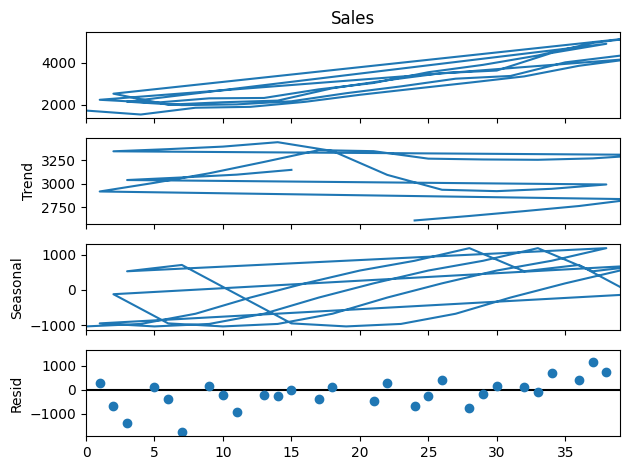

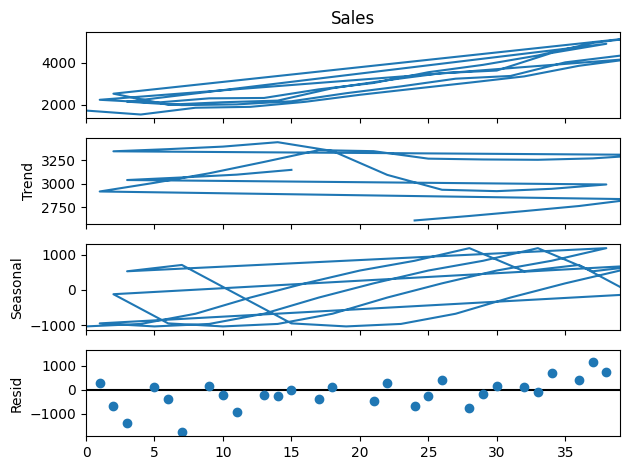

In [220]:
ts_decomp1 = seasonal_decompose(dt_.Sales,period=12)
ts_decomp1.plot()

In [221]:
#acf plot pacf plot

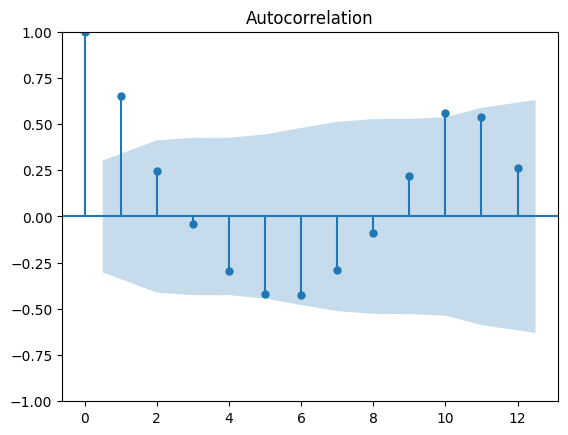

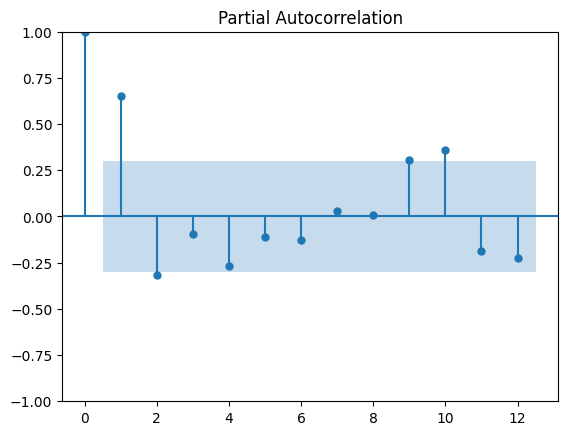

In [222]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(dt_.Sales,lags=12)
tsa_plots.plot_pacf(dt_.Sales,lags=12)
plt.show()


In [223]:
#EVALUATION METRIC MAPE

In [224]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [225]:
def MAPE(pred,org):
  tp=np.abs((pred-org)/org)*100
  return np.mean(tp)

SIMPLE EXPONENTIAL METHOD

In [226]:
ses_model1 = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses1 = ses_model1.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses1,test.Sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


25.288458803595567

In [227]:
#HOLT METHOD

In [228]:
hw_model1 = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw1 = hw_model1.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw1,test.Sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


37.20555165997862

In [229]:
#Holts winter exponential smoothing with additive seasonality and additive trend

In [230]:
hwe_model_add_add1 = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add1= hwe_model_add_add1.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add1,test.Sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


21.202023038888907

In [231]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [232]:
hwe_model_mul_add1 = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add1 = hwe_model_mul_add1.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add1,test.Sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


31.61590855404824

FINAL MODEL BY TRAIN TEST

In [233]:
hwe_model_add_add1 = ExponentialSmoothing(dt.Sales,seasonal="add",trend="add",seasonal_periods=12).fit()

In [235]:
#Forecasting for next 10 time periods
hwe_model_add_add1.forecast(10)

42    5056.646890
43    4932.026673
44    4887.444125
45    5552.032558
46    5584.776062
47    5336.121772
48    5235.569369
49    5966.721822
50    6023.798028
51    5755.308218
dtype: float64